In [4]:
%config ZMQInteractiveShell.ast_node_interactivity='all'
%pprint

Pretty printing has been turned OFF


## Pandas操作题

### 1.学生数据分析

#### 数据导入并展示, 文件位置位于../data/下
   - 请将文件student-info.csv中的内容读入pandas DataFrame "df_info"，注意该文件的分隔符是分号，并展示前五行（5分）   
   - 请将文件student-score.csv中的内容读入pandas DataFrame "df_score"，注意该文件的分隔符是分号，并展示前五行（5分）

In [5]:
import pandas as pd
df_info = pd.read_csv("./student-info.csv", sep=";")
df_score = pd.read_csv("./student-score.csv", sep=";")
df_info.head()
df_score.head()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,yes,no,no,4,3,4,1,1,3,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,yes,yes,no,5,3,3,1,1,3,4
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,yes,yes,no,4,3,2,2,3,3,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,yes,3,2,2,1,1,5,2
4,4,GP,F,16,U,GT3,T,3,3,other,...,yes,no,no,4,3,2,1,2,5,4


,ID,G1,G2,G3
0,0,5,6,6
1,1,5,5,6
2,2,7,8,10
3,3,15,14,15
4,4,6,10,10


#### 把两个DataFrame "df_info" 和 "df_score" 按照学生ID对齐拼接起来，结果存在一个新DataFrame "df" 中 

In [10]:
df = pd.merge(df_info, df_score, on='ID', how='outer')

#### 把"df"所有的列展示出来

In [14]:
df.columns

Index(['ID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#### 统计男生的平均分和女生的平均分(G1, G2, G3)，使用groupby和aggregate来操作

In [26]:
df.groupby("sex").agg('mean')[['G1','G2','G3']]

,G1,G2,G3
sex,,,
F,10.620192,10.389423,9.966346
M,11.229947,11.074866,10.914439


#### 统计不同年龄的学生(G1, G2, G3)的平均分，并作出柱状图展示

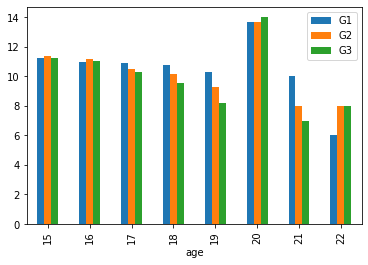

In [30]:
%matplotlib inline
df_age = df.groupby("age").agg('mean')[['G1','G2','G3']]
df_age.plot(kind='bar')

#### 统计不同学校(school一列)的学生的平均分，并作柱状图展示，要求同一科目的两个学校成绩贴在一起展示

,G1,G2,G3
school,,,
GP,10.939828,10.782235,10.489971
MS,10.673913,10.195652,9.847826


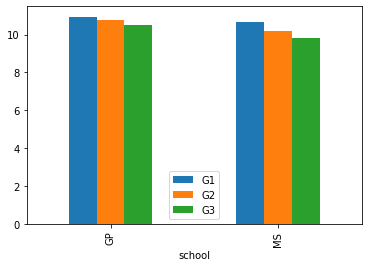

In [36]:
df_school_mean = df.groupby('school').mean()[['G1','G2','G3']]
df_school_mean.head()
df_school_mean.plot(kind='bar')

#### 统计一下每个学校三个科目总分的前十名，然后把前十名的同学所有信息输出

In [125]:
# @
df["total_score"] = df['G1'] + df['G2'] + df['G3']
df_data = df.loc[:,['school','ID','total_score']]
df_data.query("school=='GP'").sort_values(by='total_score', ascending=False).head(10)
df_data.query("school=='MS'").sort_values(by='total_score', ascending=False).head(10)

,school,ID,total_score
47,GP,47,58
113,GP,113,56
110,GP,110,56
42,GP,42,55
286,GP,286,55
129,GP,129,54
245,GP,245,54
293,GP,293,54
198,GP,198,54
306,GP,306,53


,school,ID,total_score
374,MS,374,56
359,MS,359,50
391,MS,391,46
363,MS,363,46
378,MS,378,45
376,MS,376,44
380,MS,380,43
366,MS,366,39
351,MS,351,39
360,MS,360,39


## 沃尔玛销售数据整理

### 1. 数据导入并展示, 文件位置位于 ../data下

   - 请将文件 stores.csv 中的内容读入pandas DataFrame "df_stores"，并展示前五行以及打印df_stores的shape

In [128]:
import pandas as pd
df_scores = pd.read_csv('stores.csv')
df_scores.head()
df_scores.shape

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


(45, 3)

   - 请将文件 features.csv 中的内容读入pandas DataFrame "df_feats"，将df_feats改成只留下以下几个columns: "Store", "Date", "Temperature", "Fuel_Price", "CPI", "Unemployment", 并展示前五行以及打印df_feats的shape

In [133]:
df_feats = pd.read_csv('./features.csv')
df_feats = df_feats.loc[:,["Store", "Date", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]
df_feats.head()
df_feats.shape

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,42.31,2.572,211.096358,8.106
1,1,2010-02-12,38.51,2.548,211.242170,8.106
2,1,2010-02-19,39.93,2.514,211.289143,8.106
3,1,2010-02-26,46.63,2.561,211.319643,8.106
4,1,2010-03-05,46.50,2.625,211.350143,8.106


(8190, 6)

   - 请将文件 sales.csv 中的内容读入pandas DataFrame "df_sales"，并展示前五行以及打印df_sales的shape

In [137]:
df_sales = pd.read_csv('./sales.csv')
df_sales.head()
df_sales.shape

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


(6801, 5)

#### 8. 我们发现 df_sales 中每个Store有很多个Dept(department)， 我们只关心整家店的销售情况，所以请把这张表格按照Store和Date来计算整店销售总额，IsHoliday这一列不必保留。结果保存在df_sales_by_store中

In [138]:
df_sales_by_store = df_sales.groupby(['Store','Date']).sum()[['Weekly_Sales']]
df_sales_by_store

Weekly_Sales
Store Date                    
1     2010-02-05     801534.99
      2010-02-12     781345.35
      2010-02-19     791400.65
      2010-02-26     673529.67
      2010-03-05     753437.25
...                        ...
      2012-09-28     641962.17
      2012-10-05     707441.26
      2012-10-12     672625.15
      2012-10-19     643413.75
      2012-10-26     680075.52

[143 rows x 1 columns]